In [1]:
import uproot
import numpy as np

bkg_file = uproot.open("Bkg_merged.root")
sig_file = uproot.open("Signal_merged.root")

In [2]:
sig_Tree  = sig_file["bbggSelectionTree"]
bkg_Tree  = bkg_file["bbggSelectionTree"]

In [3]:
variables = ['subleadingPhoton_pt', 'leadingPhoton_pt'     , 'subleadingPhoton_eta'        ,
             'leadingPhoton_eta'  , 'subleadingJet_pt'     , 'leadingJet_pt'               , 
             'subleadingJet_eta'  , 'leadingJet_eta'       , 'leadingJet_DeepCSV'          ,  
             'PhoJetMinDr'        , 'subleadingJet_DeepCSV', 'dijetCandidatePtOverdiHiggsM', 
             'absCosTheta_bb'     , 'HHbbggMVA'            , 'absCosThetaStar_CS'          , 
             'sigmaMJets'         , 'PhoJetotherDr']

In [4]:
import root_pandas as rp

Welcome to JupyROOT 6.16/00


In [5]:
df_sig = rp.read_root("Signal_merged.root",
                             'bbggSelectionTree', columns=variables)
df_bkg = rp.read_root("Bkg_merged.root",
                          'bbggSelectionTree', columns=variables)

In [6]:
weights_sig = rp.read_root("Signal_merged.root",
                             'bbggSelectionTree', columns=['weight']).values
weights_bkg = rp.read_root("Bkg_merged.root",
                          'bbggSelectionTree', columns=['weight']).values
print(weights_bkg[0])
weights_bkg *= 10000.
weights_sig *= 100000.
print(weights_bkg[0])
sample_weights = np.concatenate([weights_bkg, weights_sig])

[0.00011846]
[1.1846212]


In [7]:
#getting a numpy array from two pandas data frames
x = np.concatenate([df_bkg.values,df_sig.values])
#creating numpy array for target variables
y = np.concatenate([np.zeros(len(df_bkg)),
                        np.ones(len(df_sig))])

In [8]:
x_mean = np.mean(x, axis=0)
x_std = np.std(x, axis=0)

x_norm = (x - x_mean)/x_std


In [9]:
from xgboost import XGBClassifier
from xgboost import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve
# split data into train and test sets
seed = 7
train_size = int(0.6 * len(x))
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
#print(x_train.shape, sample_weights.shape)

shuffle_indices = np.arange(len(x))
np.random.shuffle(shuffle_indices)

train_idx = shuffle_indices[:train_size]
test_idx = shuffle_indices[train_size:]

x_train = x_norm[train_idx]
x_test = x_norm[test_idx]

y_train = y[train_idx]
y_test = y[test_idx]

weight_train = sample_weights[train_idx]
weight_train_test = sample_weights[test_idx]


In [10]:
model = XGBClassifier(max_depth=8, n_estimators=1000, gamma=1, silent=False,  learning_rate = .99)
model.fit(x_train, y_train, sample_weight=weight_train)

[15:51:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 18 pruned nodes, max_depth=8
[15:51:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 8 pruned nodes, max_depth=8
[15:51:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 380 extra nodes, 16 pruned nodes, max_depth=8
[15:51:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 298 extra nodes, 18 pruned nodes, max_depth=8
[15:51:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 342 extra nodes, 20 pruned nodes, max_depth=8
[15:51:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 262 extra nodes, 24 pruned nodes, max_depth=8
[15:51:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 268 extra nodes, 26 pruned nodes, max_depth=8
[15:51:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 234 extra nodes, 12 pruned nodes, max_depth=8
[

[15:52:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 144 extra nodes, 72 pruned nodes, max_depth=8
[15:52:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 50 pruned nodes, max_depth=8
[15:52:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 198 extra nodes, 60 pruned nodes, max_depth=8
[15:52:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 60 pruned nodes, max_depth=8
[15:52:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 206 extra nodes, 74 pruned nodes, max_depth=8
[15:52:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 74 pruned nodes, max_depth=8
[15:52:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 88 pruned nodes, max_depth=8
[15:52:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 46 pruned nodes, max_depth=8
[

[15:52:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 108 pruned nodes, max_depth=8
[15:52:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 118 pruned nodes, max_depth=8
[15:52:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 94 pruned nodes, max_depth=8
[15:52:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 34 pruned nodes, max_depth=7
[15:52:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 112 pruned nodes, max_depth=8
[15:52:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 84 pruned nodes, max_depth=8
[15:52:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 202 pruned nodes, max_depth=8
[15:52:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 112 pruned nodes, max_depth=8
[15

[15:53:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:53:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:53:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:53:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:53:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:53:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:53:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:53:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:53:2

[15:53:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:53:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:53:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:53:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:53:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:53:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:53:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:53:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:53:5

[15:54:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:54:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:54:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:54:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:54:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:54:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:54:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:54:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:54:3

[15:55:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:55:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:55:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:55:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:55:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:55:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:55:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:55:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:55:0

[15:55:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:55:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:55:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:55:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:55:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:55:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:55:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:55:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:55:4

[15:56:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:56:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:56:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:56:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:56:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:56:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:56:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:56:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:56:2

[15:56:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:56:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:56:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:56:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:56:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:56:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:56:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:56:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:56:5

[15:57:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:57:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:57:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:57:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:57:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:57:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:57:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:57:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:57:3

[15:58:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:58:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:58:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:58:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:58:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:58:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:58:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:58:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:58:1

[15:58:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:58:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:58:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:58:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:58:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:58:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:58:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:58:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:58:5

[15:59:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:59:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:59:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:59:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:59:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:59:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:59:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:59:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[15:59:3

[16:00:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[16:00:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[16:00:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[16:00:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[16:00:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[16:00:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[16:00:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[16:00:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 130 pruned nodes, max_depth=0
[16:00:2

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=1, learning_rate=0.99, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1)

In [11]:
y_pred = model.predict_proba(x_test)[:, 1]
predictions = [round(value) for value in y_pred]

In [15]:
import matplotlib.pyplot as plt


plt.hist(y_pred, bins=40)

(array([22534.,  2007.,  1125.,   792.,   621.,   503.,   413.,   431.,
          333.,   335.,   290.,   288.,   239.,   236.,   225.,   204.,
          228.,   210.,   200.,   237.,   206.,   222.,   221.,   204.,
          207.,   195.,   224.,   251.,   237.,   291.,   302.,   322.,
          343.,   382.,   450.,   522.,   690.,  1051.,  1739., 47543.]),
 array([1.9363695e-10, 2.5000000e-02, 5.0000001e-02, 7.5000003e-02,
        1.0000000e-01, 1.2500000e-01, 1.5000001e-01, 1.7500000e-01,
        2.0000000e-01, 2.2499999e-01, 2.5000000e-01, 2.7500001e-01,
        3.0000001e-01, 3.2499999e-01, 3.4999999e-01, 3.7500000e-01,
        4.0000001e-01, 4.2500001e-01, 4.4999999e-01, 4.7499999e-01,
        5.0000000e-01, 5.2499998e-01, 5.5000001e-01, 5.7499999e-01,
        6.0000002e-01, 6.2500000e-01, 6.4999998e-01, 6.7500001e-01,
        6.9999999e-01, 7.2500002e-01, 7.5000000e-01, 7.7499998e-01,
        8.0000001e-01, 8.2499999e-01, 8.5000002e-01, 8.7500000e-01,
        8.9999998e-01, 9.2

In [19]:
weight_train_test = weight_train_test.reshape(87053)
print(weight_train_test.shape)

(87053,)


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


disc_bkg:  [3.4280942e-04 7.4939221e-06 5.0826598e-04 ... 1.2536004e-02 7.8049350e-01
 5.8490352e-04]
disc_signal:  [0.99992347 0.99981207 0.9999182  ... 0.99999845 0.9494941  0.57407767]


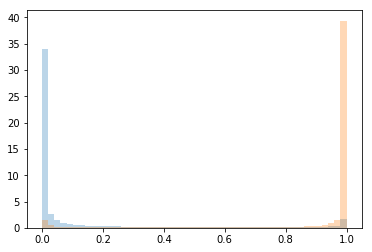

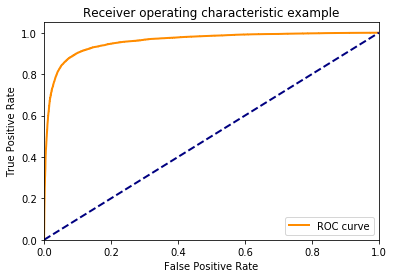

In [20]:
import pandas as pd

y_frame = pd.DataFrame({'truth':y_test, 'disc':y_pred, 'weight':weight_train_test})
disc_bkg    = y_frame[y_frame['truth'] == 0]['disc'].values
disc_signal = y_frame[y_frame['truth'] == 1]['disc'].values
weight_bkg = y_frame[y_frame['truth'] == 0]['weight'].values
weight_signal = y_frame[y_frame['truth'] == 1]['weight'].values
plt.figure()
plt.hist(disc_bkg, weights=weight_bkg, normed=True, bins=50, alpha=0.3)
plt.hist(disc_signal, weights=weight_signal, normed=True, bins=50, alpha=0.3)
plt.savefig('mydiscriminator.png')
print ("disc_bkg: ", disc_bkg)
print ("disc_signal: ", disc_signal)
fpr, tpr, _ = roc_curve(y_test, y_pred, sample_weight = weight_train_test)
plt.figure()


lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
#plt.show()
plt.savefig('myroc_' + '.png')

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))